<center><h1> Virtual Patient Data Analysis Demo</h1> </center>

This Jupyter Notebook will serve as a live, high level demonstration of patient data analysis with virtual electronic medical records (EMR) through the inovative and powerful Jupyter platform. Not only will this notebook introduce the idea of Jupyter Notebooks as a Business Intelligence (BI) tool for data science projects, but also this notebook will serve as a foundation to discuss further data analysis applications. Moreover, this will also provide context for future notebooks that dig deeper into state-of-the-art data science tools. 

The goal of this demonstration is to show that when these open-source data science tools are used in unison, the beneficial applications of such are only limited by our imagination. 

<h2> Outline </h2>
<ol>
<li> Introduce the Idea of Jupyter Notebook as a BI tool for Data Science. </li>
    <ol>
    <li> Notebook Features.</li>
    <li> Jupyter Workflow.</li>
    </ol>
<li> Virtual Patient Data Analysis Demo </li>
    <ol>
    <li> Load data from SQL </li>
    <li> Inspect data </li>
    <li> Clean data / Feature Engineering</li>
    <li> Basic Analysis </li>
        <ol>
        <li> Create and Compare Cohorts </li>
        <li> Visually represent data </li>
        <li> Logistic Regression, Clustering, and Evolutionary Algorithms </li>
        </ol>
    </ol>
<li> Demonstrate interactive widgets </li>
<li> Demonstrate the polymorphic views of notebooks </li>
    <ol>
    <li> Creating reports </li>
    <li> Displaying live code </li>
    <li> Creating dashboards </li>
    </ol>
</ol>
    

<center>


<h2>1) Jupyter Notebook: The BI Tool for Data Science</h2>
</center>
<br/>
The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, reports, and explanatory text all in one place. Notebooks make it easier than ever to explore hypotheses, prototype, and collaborate on data science projects. 

One of Jupyter's most powerful features is that notebooks are "live". This allows for instant feedback and collaboration with all stakeholders from the programmer to the mathmatician to the business leader. 



<h3> Features: </h3>
<ul>
<li> live code </li>
<li> Over 40 languages supported </li>
<li> explantatory text & video </li>
<li> interactive widgets </li>
<li> visualizations </li>
<li> exploration </li>
<li> simulation </li>
<li> modeling </li>
<li> machine learning </li>
<li> production workflow </li>
<li> shareable </li>
<li> browser accessible </li>
<li> FREE! </li>
</ul>

![](jupyter_workflow.png)





## Use Case

### Cohort Creation
In research and statistics, a cohort is a group of individuals who share a characteristic at some specific time and who are then followed forward in time, with data being collected at one or more suitable intervals. The most common use of the term is to describe a birth cohort, in which all the group members are born in a specified time period, but other common characteristics could define the cohort, such as marriage date, exposure to an infectious agent, or date of diagnosis or of treatment for a disease.

### Cohort Analysis
Cohort analysis is a study that focuses on the activities of a particular cohort. If we were to calculate the average lab result of a white blood cell count of patients over the course of a five year period following a certain diagnosis, we would be conducting a cohort analysis.

### Cohort Dashboard
A business intelligence dashboard is a data visualization tool that displays the current status of metrics and key performance indicators (KPIs) for a cohort. Dashboards consolidate and arrange numbers, metrics and sometimes performance scorecards on a single screen.

<center> <h2> 2) Virtual Patient Data Analysis Demo </h2> </center>

<h3>Import dependencies: </h3>

<li> <h3>Dataframe:</h3></li>
The concept of a data frame comes from the world of statistical software used in empirical research; it generally refers to "tabular" data: a data structure representing cases (rows), each of which consists of a number of observations or measurements (columns). Alternatively, each row may be treated as a single observation of multiple "variables". In any case, each row and each column has the same data type, but the row ("record") datatype may be heterogenous (a tuple of different types), while the column datatype must be homogenous. Data frames usually contain some metadata in addition to data; for example, column and row names.

Data frame APIs usually support more or less elaborate methods for slicing-and-dicing the data, such as "selecting" rows, columns, and cells by name or by number; filtering out rows; "recoding" column and row names; normalizing data (e.g. converting units of measure); adding new columns (e.g. summing some fields); and much, much, more!

<li> <h3>Pandas:</h3></li>
Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

<li><h3>Visualization Libraries: </h3></li>
<ul> <li> <h4>Matplotlib </h4>
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.</li>
<li> <h4>Seaborn</h4>
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.</li>
</ul>

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import style
style.use('fivethirtyeight')
import time
import datetime
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

<h3> Load Data </h3>

### SQL

Data can be loaded into Jupyter Notebooks from almost anywhere including SQL, CSV, HTML, JSON, and much much more.

We created a Linix environment providing an instance of MS SQL that can be used to read and write data from. For brevity in this demo, we loaded the files directly from CSV files.

In [3]:
#import pyodbc

#dsn = 'sqlserverdatasource'
#user = 'SA'
#password = 'SQL73s71ng'
#database = 'testdb'
#con_string = 'DSN=%s;UID=%s;PWD=%s;DATABASE=%s;' % (dsn, user, password, database)

# cnxn and cursor
#cnxn = pyodbc.connect(con_string)
#cursor = cnxn.cursor()

#cursor.execute("SELECT * FROM patients WHERE quantity > 0;")

#print(cursor.fetchone())

#sql = 'select * from table'

#data = pandas.read_sql(sql, cnn)

In [4]:
# Set file paths
patient_file = "/Users/bwi/Documents/VA_Demo/100-patients/PatientCorePopulatedTable.txt"
admissions_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsCorePopulatedTable.txt"
diagnoses_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsDiagnosesCorePopulatedTable.txt"
labs_file = "/Users/bwi/Documents/VA_Demo/100-patients/LabsCorePopulatedTable.txt"

# Read files into Dataframes
patients = pd.read_csv(patient_file, sep="\t")
admissions = pd.read_csv(admissions_file, sep="\t")
diagnoses = pd.read_csv(diagnoses_file, sep="\t")
labs = pd.read_csv(labs_file, sep="\t")

# Create Dataframe copies for cleaning
clean_patients = patients
clean_admissions = admissions
clean_diagnoses = diagnoses
clean_labs = labs

### Inspect Data

In [5]:
#patients.head()

In [6]:
#admissions.head()

In [7]:
#diagnoses.head()

In [8]:
#labs.head()

### Describe Data

In [9]:
patients.describe(include= "all")

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
count,100,100,100,100,100,100,100.000000
unique,100,2,100,4,6,4,NaN
top,2A5251B1-0945-47FA-A65C-7A6381562591,Female,1961-10-22 02:47:13.170,White,Married,English,NaN
freq,1,52,1,49,45,64,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,22.102500
std,NaN,NaN,NaN,NaN,NaN,NaN,23.327656
min,NaN,NaN,NaN,NaN,NaN,NaN,1.700000
25%,NaN,NaN,NaN,NaN,NaN,NaN,12.702500
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.435000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.687500


In [470]:
#admissions.describe(include = "all")

In [471]:
#diagnoses.describe(include = "all")

In [472]:
#labs.describe(include = "all")

## Data Quality Report

In [28]:
def print_data_quality_report(data):
    columns = pd.DataFrame(list(data.columns.values))
    data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])
    missing_data_counts = pd.DataFrame(data.isnull().sum(), columns = ['Missing Values'])
    present_data_counts = pd.DataFrame(data.count(), columns=['Present Values'])

    unique_value_counts = pd.DataFrame(columns=['Unique Values'])
    for v in list(data.columns.values):
        unique_value_counts.loc[v] = [data[v].nunique()]

    minimum_values = pd.DataFrame(columns=['Minimum Value'])
    for v in list(data.columns.values):
        minimum_values.loc[v] = [data[v].min()]

    maximum_values = pd.DataFrame(columns=['Maximum Value'])
    for v in list(data.columns.values):
        maximum_values.loc[v] = [data[v].max()]

    data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts).join(minimum_values).join(maximum_values)

    print("\nData Quality Report")
    print("Total records: {}".format(len(data.index)))
    print(data_quality_report)
    
print_data_quality_report(patients)


Data Quality Report
Total records: 100
                                        Data Type  Present Values  \
PatientID                                  object             100   
PatientGender                              object             100   
PatientDateOfBirth                         object             100   
PatientRace                                object             100   
PatientMaritalStatus                       object             100   
PatientLanguage                            object             100   
PatientPopulationPercentageBelowPoverty   float64             100   

                                         Missing Values  Unique Values  \
PatientID                                             0          100.0   
PatientGender                                         0            2.0   
PatientDateOfBirth                                    0          100.0   
PatientRace                                           0            4.0   
PatientMaritalStatus                 

## Cleanning Data and Feature Engineering

Data preparation (or, alternatively, data conditioning) is an important phase in the data science lifecycle. This phase is generally understood as the “data scrubbing”, or data cleaning, phase. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. This phase includes everything needed to format the data into a state that can be usable. Tasks include table, record, and attribute selection as well as transformation and cleaning of data for modeling tools, double checking inputs entered by hand, flagging questionable or statistically impossible data points, removing missing data points, describing the data with metadata.

This process is much easier thanks to python libraries like Pandas that allow the data scientist to efficiently manipulate the data in the dataframes. 

In [473]:
# Feature Maps
gender = {'Male':1, 
         'Female':2}

# For ICDCodes:
#     (A-Z) = (1 - 26)
#     (00-99) remains the same
#     ".xxx" will be dropped for engineer feature

# Age will be calculated by BirthDate minus currentDate

race = {'Unknown': 0,
        'African American': 1,
        'White': 2,
        'Asian': 3}

# PatientID will be engineered into unique index (1-100)
patient_id_reduced = {}
count = 0
for patient in patients['PatientID']:
    if patient not in patient_id_reduced:
        count = count + 1
        patient_id_reduced[patient] = count
#print(patient_id_reduced)


#Return value at index from 'm' list:
def index_cat(i, m):
    return m[i]
    
#clean_patients['PatientID'] = clean_patients['PatientID'].apply(lambda x: index_cat(x, patient_id_reduced))
clean_patients['PatientGender'] = [1 if x == 'Male' else 0 for x in clean_patients['PatientGender'] ]

def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

clean_patients['Age'] = pd.to_datetime(clean_patients.loc[:,'PatientDateOfBirth'])
clean_patients = clean_patients.drop('PatientDateOfBirth', 1)
clean_patients['Age'] = clean_patients['Age'].apply(lambda x: calculate_age(x))
clean_patients = clean_patients.drop('PatientPopulationPercentageBelowPoverty', 1)
clean_patients['PatientRace'] = clean_patients['PatientRace'].apply(lambda x: index_cat(x, race))

clean_patients['PatientMaritalStatus'] = patients['PatientMaritalStatus'].map(
    {'Single': 0, 'Married': 1, 'Separated': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5})

clean_patients['PatientLanguage'] = patients['PatientLanguage'].map(
    {'English': 0, 'Icelandic': 1, 'Spanish': 2, 'Unknown': 3})





In [474]:
def plot_correlation_map( df ):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    _ , ax = plt.subplots( figsize =( 50 , 35 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        mask=mask,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        #annot = True, 
        #annot_kws = { 'fontsize' : 12 }
        #vmax=.8 sets side bar range
        linewidths=.5
    )

#plot_correlation_map( clean_patients )

#### Cleaning ICD10 Codes to represent categories of disease

In [475]:
# Engineering new feature: Disease Category (String)
ICDCodes = diagnoses["PrimaryDiagnosisCode"]
icd_codes = []

# Parse out sub ICD category
ICDCodes = pd.DataFrame([code[0:3] for code in ICDCodes])
sortedICD = ICDCodes.sort_values(0)

# Add ICDCodes (sub-category) to diagnoses DF and evaluate
diagnoses["ICDCodes"] = ICDCodes

patient_diags = diagnoses
patient_diags = patient_diags.drop(['AdmissionID','PrimaryDiagnosisCode','PrimaryDiagnosisDescription'], 1)
patient_diags['PatientID'] = admissions['PatientID'].apply(lambda x: index_cat(x, patient_id_reduced))


# Push unique ICDCodes into icd_codes list
for x in ICDCodes[0]:
    if x not in icd_codes:
        icd_codes.append(x)
del icd_codes[0]

# Create ICD columns in patients
for code in sortedICD[0]:
    clean_patients[code] = 0

patient_dict = {k: g["ICDCodes"].tolist() for k,g in patient_diags.groupby("PatientID")}

for key in patient_dict:
    for e in patient_dict[key]:
        clean_patients.set_value(key - 1, e, 1)






## Visualize Data

We can leverage mature visualization libraries in Python like matplotlib and seaborn to efficiently visualize our data "live" and in-line with the Jupyter Notebook. 

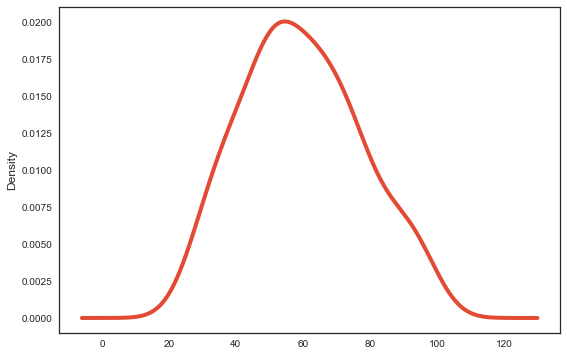

In [539]:
# Value Counts
#fig = diagnoses.ICDCodes.value_counts()[:20].plot(kind='bar')

#Histogram
#fig = clean_patients['Age'].hist(color='b')

fig = clean_patients['Age'].plot(kind='kde')


### Correlation Map
A correlation matrix (Map) is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

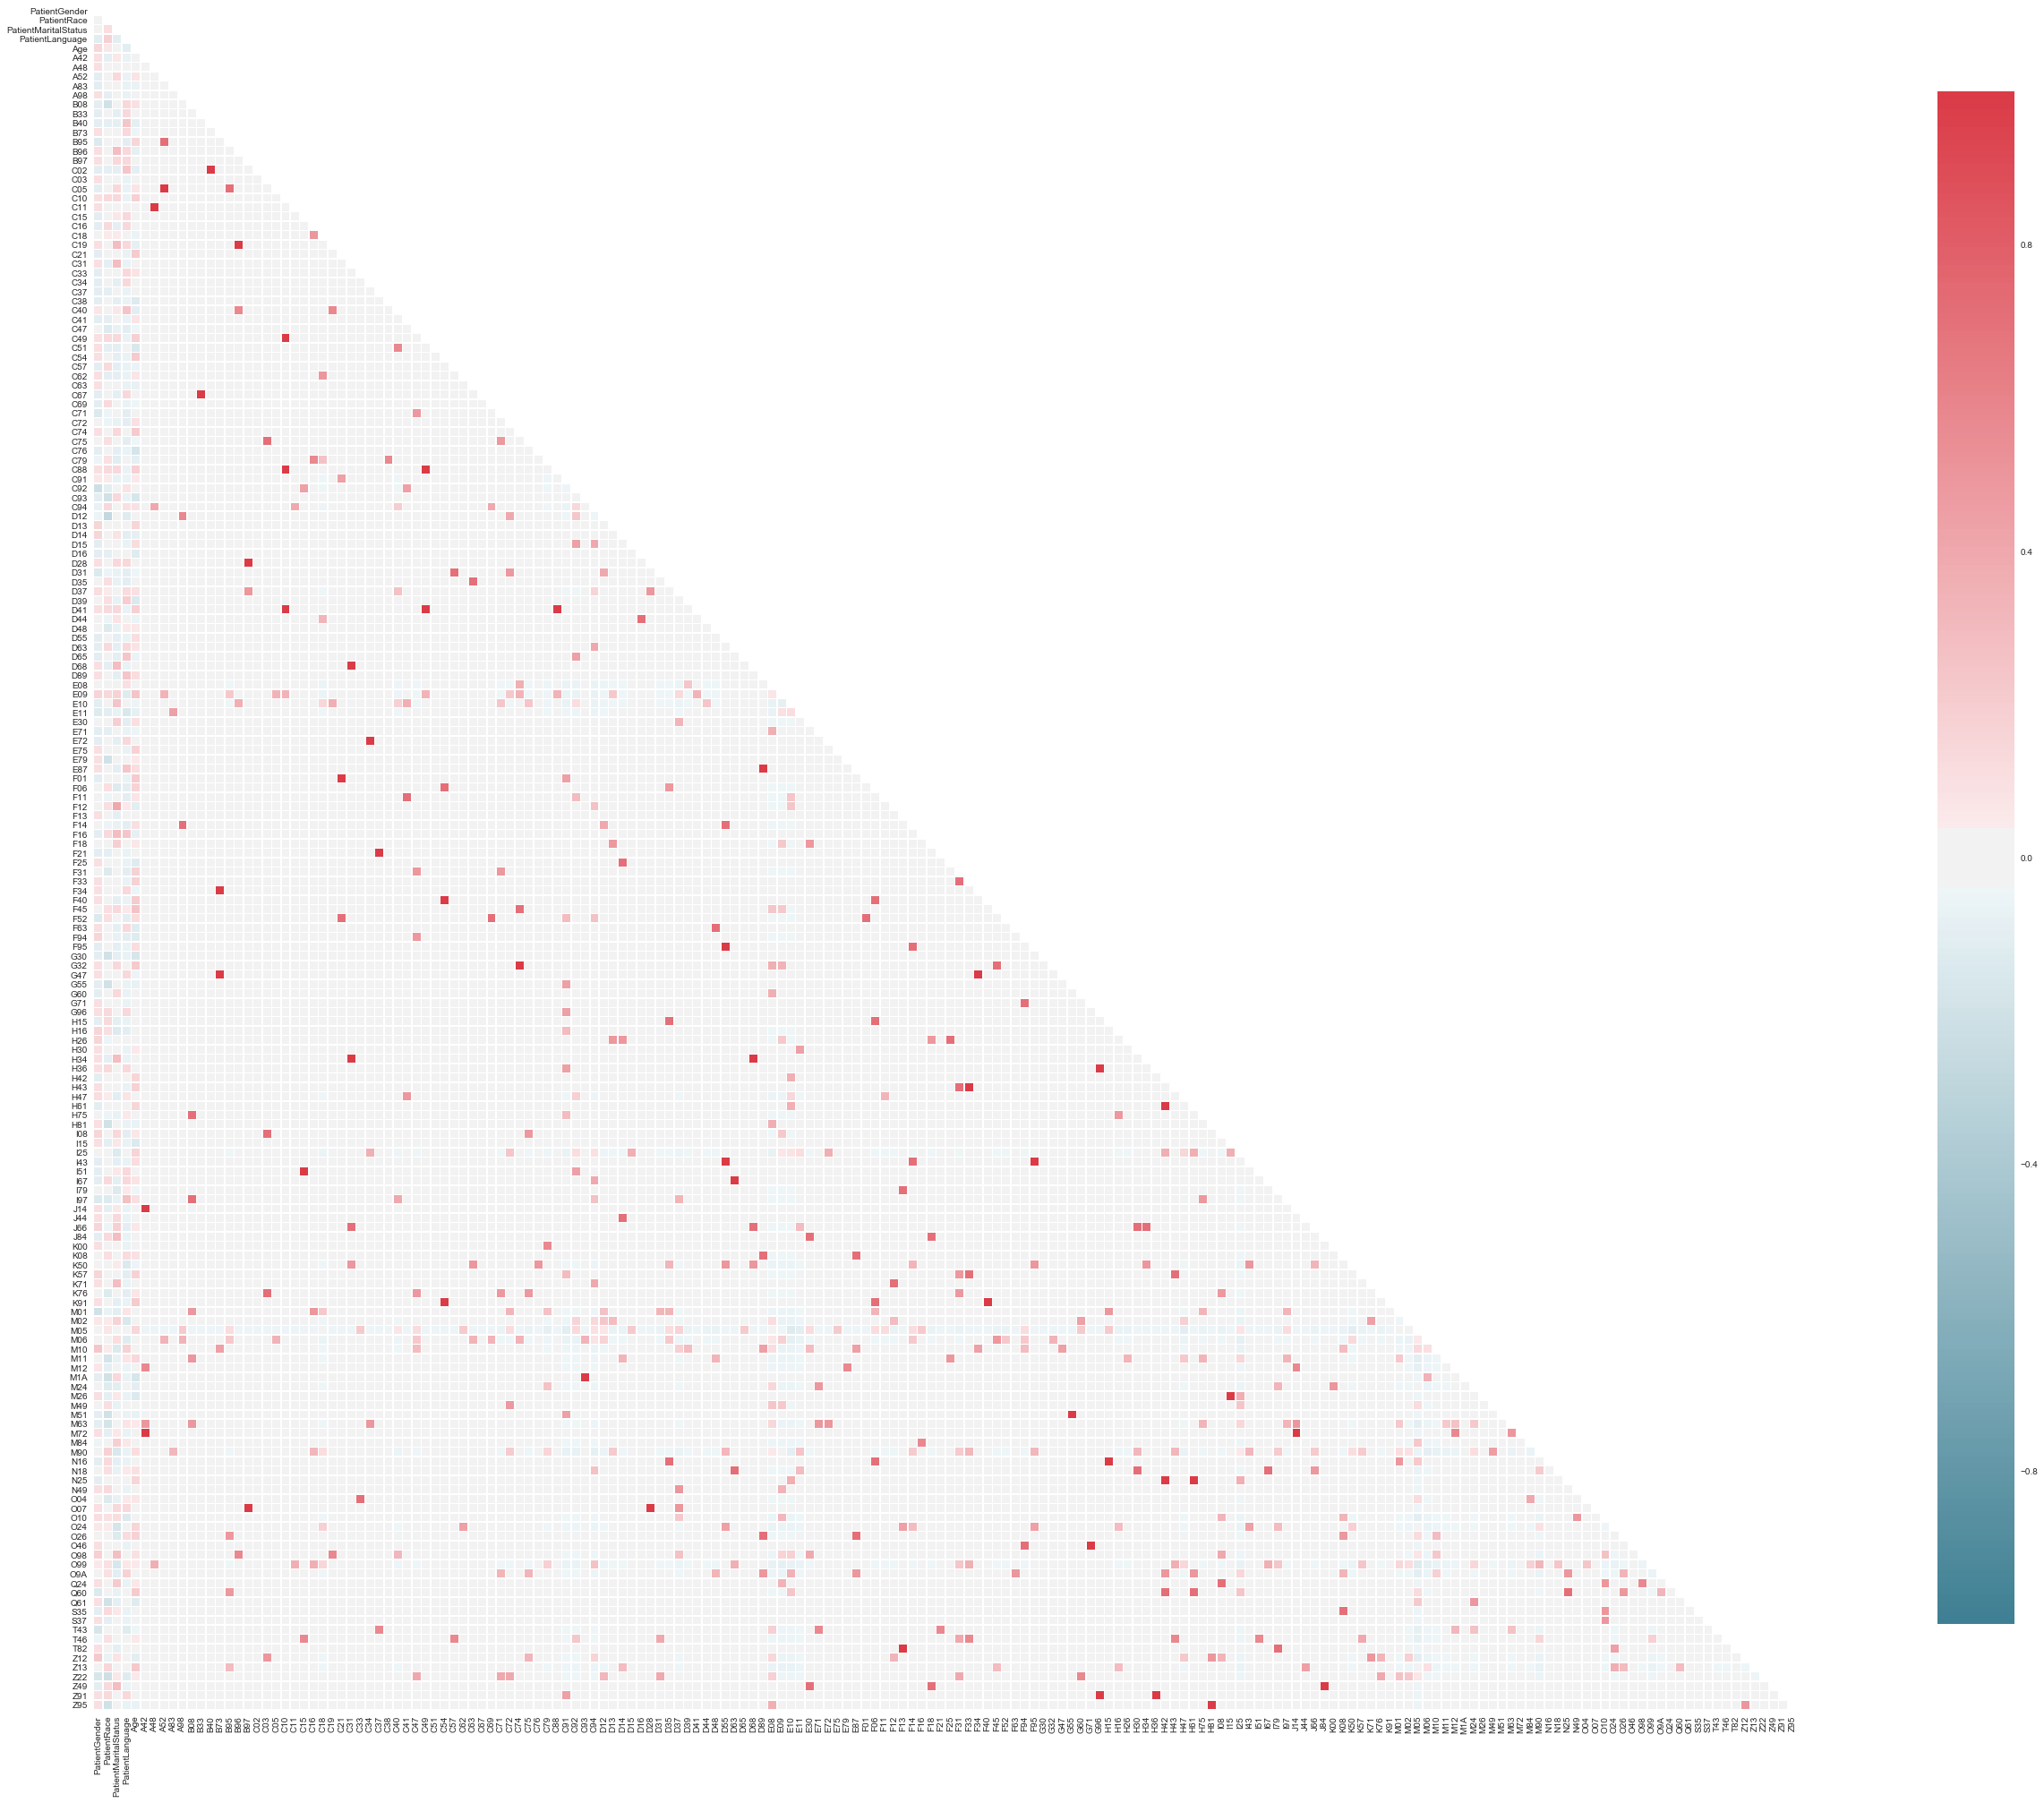

In [477]:
# Correlation Maps
plot_correlation_map( clean_patients )


## Cohort Creation

### Rheumatoid Arthritis Cohort
Rheumatoid arthritis is a chronic inflammatory disorder that can affect more than just your joints. In some people, the condition also can damage a wide variety of body systems, including the skin, eyes, lungs, heart and blood vessels.

An autoimmune disorder, rheumatoid arthritis occurs when your immune system mistakenly attacks your own body's tissues.

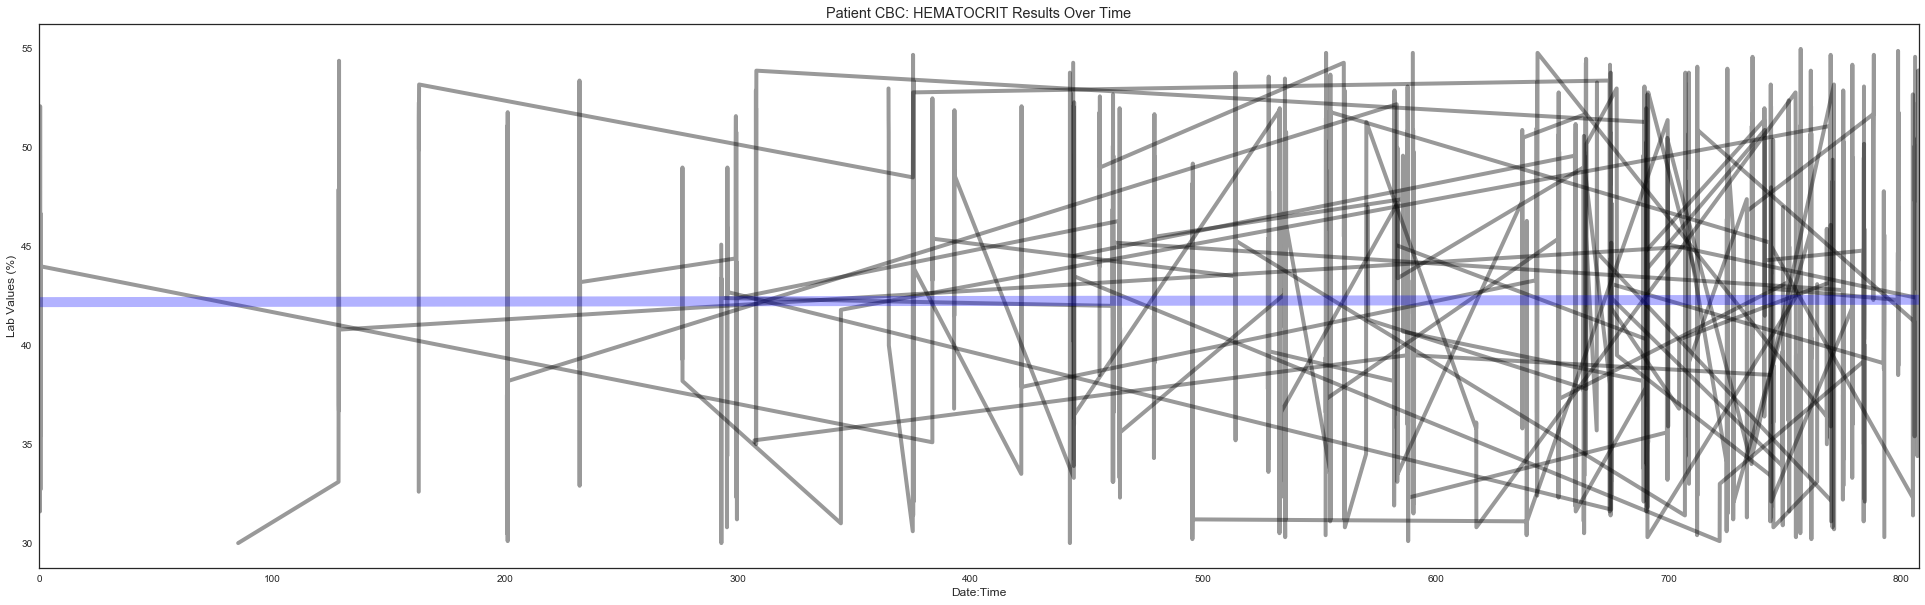

In [478]:
# Create a cohort of all M05 Patients
M05_cohort_patient_ids = diagnoses.loc[(diagnoses['ICDCodes'] == 'M05'), 'PatientID'];

# Combine demographics with M05 cohort
M05_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]

M05_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]

# Filter cohort with HEMATOCRIT lab results
M05_cohort_hematocrit_results = M05_cohort_lab_results.loc[(M05_cohort_lab_results['LabName'] == 'CBC: HEMATOCRIT')]

M05_h = M05_cohort_hematocrit_results[['PatientID', 'LabValue', 'LabDateTime']]

M05_h['TimeStamps'] = pd.to_datetime(M05_h.loc[:,'LabDateTime'])

M05_h['TimeStamps']
M05_h = M05_h[['PatientID', 'LabValue','TimeStamps']]

# Change TimeStamps to integers
M05_h['date_delta'] = (M05_h['TimeStamps'] - M05_h['TimeStamps'].min())  / np.timedelta64(1,'M')

fig, ax = plt.subplots(1,1)
x = 'date_delta'
y = 'LabValue'
M05_h.groupby('PatientID').plot(x, y, figsize=(30,10), ax=ax, alpha=0.4, color="k")
plt.legend().remove()
plt.ylabel('Lab Values (%)')
plt.xlabel('Date:Time')
plt.title('Patient CBC: HEMATOCRIT Results Over Time')

from scipy.stats import linregress
def fit_line1(x, y):
    """Return slope, intercept of best fit line."""
    # Remove entries where either x or y is NaN.
    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
    (_, x), (_, y) = clean_data.iteritems()
    slope, intercept, r, p, stderr = linregress(x, y)
    return slope, intercept # could also return stderr

import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse


x2 = M05_h['date_delta']
y2 = M05_h['LabValue']
m, b = fit_line2(x2, y2)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x2.min(), x2.max(), N)
plt.plot(points, m*points + b, linewidth=10, color="b", alpha=.3)





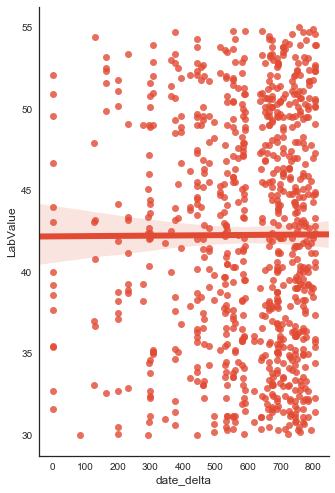

In [540]:
sns.pairplot(M05_a, x_vars=['date_delta'], y_vars='LabValue',size=7,aspect=0.7,kind='reg')

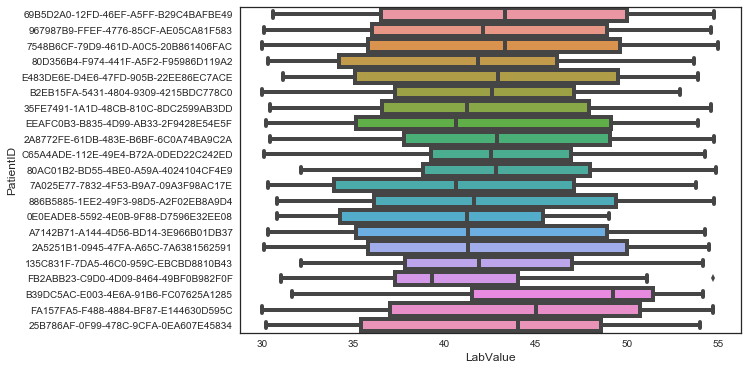

In [542]:
ax5 = sns.boxplot(x='LabValue', y='PatientID', data=M05_a)

## Categorize and Predict "At-Risk" M05 Patients

In [481]:
M05_h['at_risk'] = [1 if x > 50 or x < 35 else 0 for x in M05_h['LabValue'] ]

In [482]:
# Creating a database of each patient and their historical lab values so we can make predictions.
M05_database = []
M05_patients = []
M05_a = M05_h[['PatientID', 'LabValue', 'date_delta']]
#M05_a = M05_a.groupby('PatientID')
for index, row in M05_a.iterrows():
    patientID = row['PatientID']
    if (patientID not in M05_patients):
        M05_patients.append(patientID)
        M05_database.append(
                M05_a[M05_a['PatientID'] == patientID]
        ) 
M05_db_len = len(M05_database) # Number of patients


In [483]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

M05_database[0]['date_delta'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
#norm = pd.Series((M05_database[0]['date_delta'] - M05_database[0]['date_delta'].min()) / (M05_database[0]['date_delta'].max() - M05_database[0]['date_delta'].min()))
#M05_database[0].loc['normalized_date_delta'] = norm

feature_cols = ['date_delta']
X = M05_database[0][feature_cols]


y = M05_database[0]['LabValue'] 


# SVM Classifier
#clf = svm.SVC()

# Create Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# clf.fit(X_train, y_train) 

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#X_test.apply(pd.to_numeric)
#y_pred = clf.predict(X_test)
y_pred = linreg.predict(X_test.apply(pd.to_numeric))



#y_pred = linreg.predict(X_test)

x = M05_database[0]['date_delta'].iloc[0] - 1;
x_norm_pred = ( x - M05_database[0]['date_delta'].mean() ) / (M05_database[0]['date_delta'].max() - M05_database[0]['date_delta'].min())
# Next Lab Value prediction 30 days from last test. 
#print(x_norm_pred)
next_pred = linreg.predict(x_norm_pred)
#print(next_pred)
#print(y_pred)


## 30 day Hematocrit Lab Result Predictions for each M05 patient

In [484]:
# Create Linear Regression Model and 30 day lab value prediction for each patient. 

for patient in M05_database:

    feature_cols = ['date_delta']
    #X = M05_database[0][feature_cols] ORIGINAL
    X = patient[feature_cols] #CHANGE
    #y = M05_database[0]['LabValue'] ORIGINAL
    y = patient['LabValue'] # CHANGE
    
    # Create Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # clf.fit(X_train, y_train) 

    # Linear Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test.apply(pd.to_numeric))

    # Next Lab Value prediction 30 days from last test. 
    next_pred = linreg.predict(patient['date_delta'].iloc[0] - 1)
    print("Patient: ", patient['PatientID'].iloc[0])# Potentially shows if LabValue is increasing or decreasing over time?
    
    # Print cooefficient for correlation
    print("Date Coefficient: ", list(zip(feature_cols, linreg.coef_)))
    
    # Print error value
    print("Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
    
    #print("30 day: ", patient['date_delta'].iloc[-1] + 30, )
    print("Lab Value Prediction: ", next_pred)
    if next_pred < 35 or next_pred > 50:
        print("This patient is at risk!")
    print('\n')
    #patient.set_value('FutureLabTest',0, next_pred)
    
# Wrap everything in a function and create a list of all patient's 30 day prediction!

Patient:  69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49
Date Coefficient:  [('date_delta', -0.0040197023554973919)]
Error:  2.54707511513
Lab Value Prediction:  [ 42.05050072]


Patient:  967987B9-FFEF-4776-85CF-AE05CA81F583
Date Coefficient:  [('date_delta', 0.0065495295335211727)]
Error:  2.3327159457
Lab Value Prediction:  [ 38.8560568]


Patient:  7548B6CF-79D9-461D-A0C5-20B861406FAC
Date Coefficient:  [('date_delta', -0.0072331536619314402)]
Error:  2.71130850906
Lab Value Prediction:  [ 43.21302885]


Patient:  80D356B4-F974-441F-A5F2-F95986D119A2
Date Coefficient:  [('date_delta', 0.00190641588136154)]
Error:  2.74812612222
Lab Value Prediction:  [ 40.40193086]


Patient:  E483DE6E-D4E6-47FD-905B-22EE86EC7ACE
Date Coefficient:  [('date_delta', -0.01130612102977036)]
Error:  2.29991126751
Lab Value Prediction:  [ 45.99951824]


Patient:  B2EB15FA-5431-4804-9309-4215BDC778C0
Date Coefficient:  [('date_delta', -0.0013941232882976424)]
Error:  2.28366387919
Lab Value Prediction:  [ 42.638820

### One patient ( 'EEAFC0B3-B835-4D99-AB33-2F9428E54E5F' ) is predicted to be at-risk in the next 30 days with a lab value of less than 35.

## Dynamic Cohort Creation Dashboard

In [556]:
def create_cohort (diseases = None, labNames = None):
    if diseases == None and labNames == None:
        return None
    elif labNames == None:
        cohort = diseases;
    
        # Create Cohort - This will create a list of series of PatientIDS who have specified disease
        cohort_patient_ids = [ diagnoses.loc[(diagnoses['ICDCodes'] == x), 'PatientID'] for x in cohort ]
        
        # Append each series from the list into one series 
        series = pd.Series()
        for s in cohort_patient_ids:
            series = series.append(s, ignore_index=True)
        series = series.drop_duplicates() 
        #return(series)
    
        # Collect Demograpic Info
        #cohort_patients = clean_patients[clean_patients['PatientID'].isin(series)]
        
        # Collect Comorbidities
        cohort_patients = diagnoses[diagnoses['PatientID'].isin(series)]
        
    
        # Collect Lab Results
        #cohort_patients = labs[labs['PatientID'].isin(series)]
        
        return(cohort_patients)
    
    
        #--------------------------
        # DEVELOPING
        #--------------------------
    elif diseases == None:
        
 
    
        
        # Collect Cohort Lab Results
        cohort_lab_results =  labs[labs['LabName'].isin(labNames)]
        
        return(cohort_lab_results);
        #cohort_lab_results =  labs[labs['PatientID'].isin(cohort_patients)]
    

## Jupyter Widgets

Notebooks come alive when interactive widgets are used. Users gain control of their data and can visualize changes in the data.Learning becomes an immersive experience. Researchers can easily see how changing inputs to a model impact the results.

In [563]:
from pivottablejs import pivot_ui
import ipywidgets as widgets
from IPython.display import display

caption = widgets.Label(value='Enter ICD Code or Disease: ')
text = widgets.Text()
display(caption, text)

cohort_wrapper = []
def handle_submit(*args):
    print(text.value)
    if len(text.value) > 3:
        cohort_d = create_cohort(labNames = [text.value])
        cohort_wrapper.append(cohort_d)
    else:
        cohort_d = create_cohort([text.value])
        cohort_wrapper.append(cohort_d)
    pivot_ui(cohort_wrapper[0])

    
text.on_submit(handle_submit, cohort_wrapper)




E10


In [565]:
pivot_ui(cohort_wrapper[0])
#cohort_wrapper[0].Age.hist(color='b')
#cohort_wrapper[0].head()

## Rheumatoid Arthritis Cohort

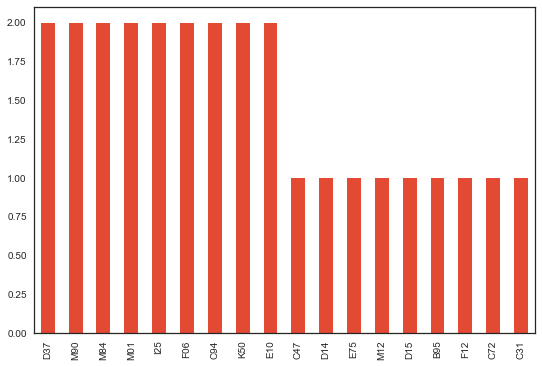

In [494]:
M05_sub = create_cohort(['M05'])
M05_sub.ICDCodes.value_counts()[2:20].plot(kind='bar')

In [547]:
pivot_ui(M05_sub)

In [447]:
#print(clean_patients.iloc[96 - 1])

## Diabetes cohort

In [548]:
diabetes_cohort = create_cohort(['E08', 'E09', 'E10', 'E11', 'E12', 'E13'])
#diabetes_cohort.head()

In [450]:
pivot_ui(diabetes_cohort)

## COPD cohort

In [549]:
copd_cohort = create_cohort(['J44'])
#copd_cohort.head()

In [550]:
pivot_ui(copd_cohort)

### Conclusion

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

Jupyter Notebook is creates a unified platform where programmers to mathmaticians to business leaders can collaborate on data science projects.